In [61]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

# Predictions Analysis

In [62]:
# Load the dataset
df = pd.read_feather("model_predictions.feather")

In [63]:
# Display basic information
display(df.head())
display(df.describe())
display(df.info())

model_name  true_weight  \
0  vit_b_16_scaling_factor_pixel_spacing_slice_th...         61.0   
1  vit_b_16_scaling_factor_pixel_spacing_slice_th...         60.0   
2  vit_b_16_scaling_factor_pixel_spacing_slice_th...         52.0   
3  vit_b_16_scaling_factor_pixel_spacing_slice_th...         89.0   
4  vit_b_16_scaling_factor_pixel_spacing_slice_th...         85.0   

   predicted_weight set_type additional_params         patient_id  \
0         75.226959    Train              None  ANONYM-SMUXNZ_159   
1         69.510887    Train              None   ANONYM-GS4VD_115   
2         72.877876    Train              None  ANONYM-LWQW5V_143   
3         81.838478    Train              None  ANONYM-XT8UJZ_117   
4         84.898613    Train              None  ANONYM-SMUXNZ_310   

  pixel_array_file  
0    Scan_3774.npy  
1    Scan_4161.npy  
2     Scan_343.npy  
3    Scan_1163.npy  
4    Scan_3925.npy

true_weight  predicted_weight
count  3.737025e+06      3.737025e+06
mean   7.753292e+01      7.830459e+01
std    1.742778e+01      1.835267e+01
min    1.700000e+01      1.115463e+00
25%    6.600000e+01      6.591089e+01
50%    7.600000e+01      7.703343e+01
75%    8.700000e+01      8.895892e+01
max    1.870000e+02      2.563711e+02

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737025 entries, 0 to 3737024
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   model_name         object 
 1   true_weight        float64
 2   predicted_weight   float64
 3   set_type           object 
 4   additional_params  object 
 5   patient_id         object 
 6   pixel_array_file   object 
dtypes: float64(2), object(5)
memory usage: 199.6+ MB


None

C:\Users\minem\miniconda3\envs\R&D\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minem\miniconda3\envs\R&D\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


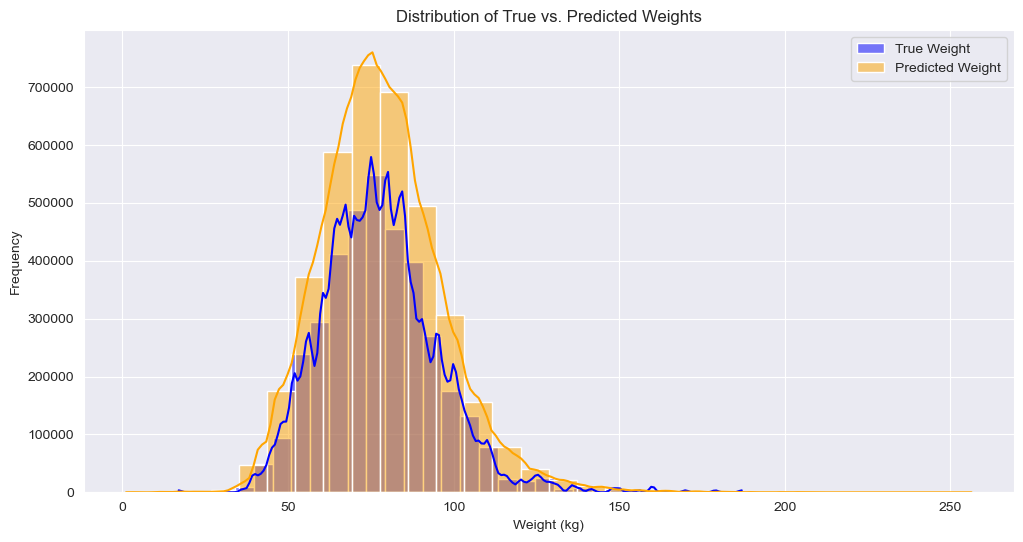

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(df['true_weight'], color='blue', kde=True, label='True Weight', bins=30)
sns.histplot(df['predicted_weight'], color='orange', kde=True, label='Predicted Weight', bins=30)
plt.legend()
plt.title("Distribution of True vs. Predicted Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.show()

In [65]:
# Calculate absolute error
df['absolute_error'] = abs(df['true_weight'] - df['predicted_weight'])

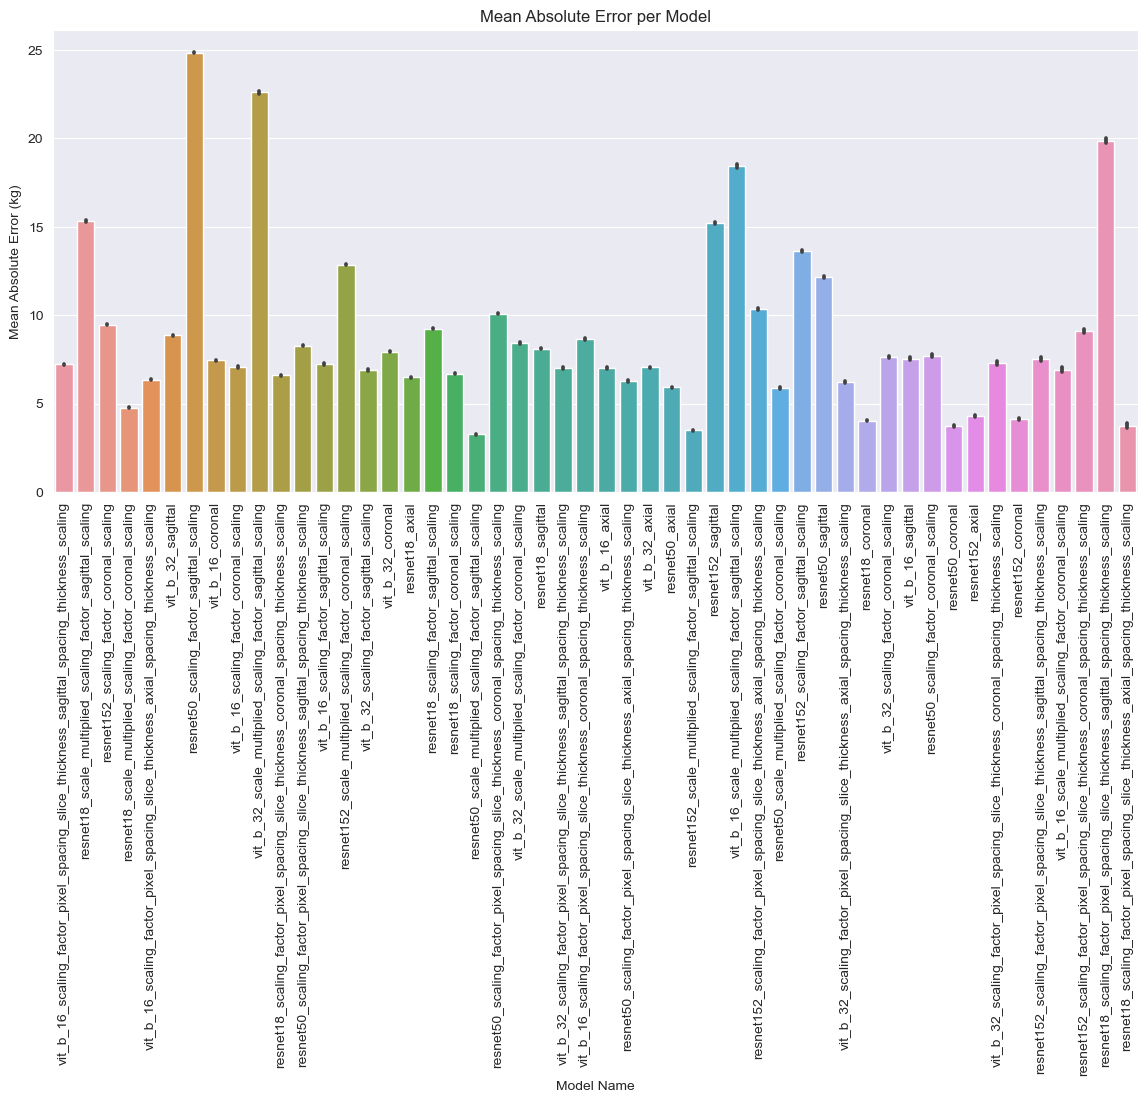

In [66]:
# Plot mean absolute error per model
plt.figure(figsize=(14, 6))
sns.barplot(x='model_name', y='absolute_error', data=df, estimator='mean')
plt.xticks(rotation=90)
plt.title("Mean Absolute Error per Model")
plt.ylabel("Mean Absolute Error (kg)")
plt.xlabel("Model Name")
plt.show()

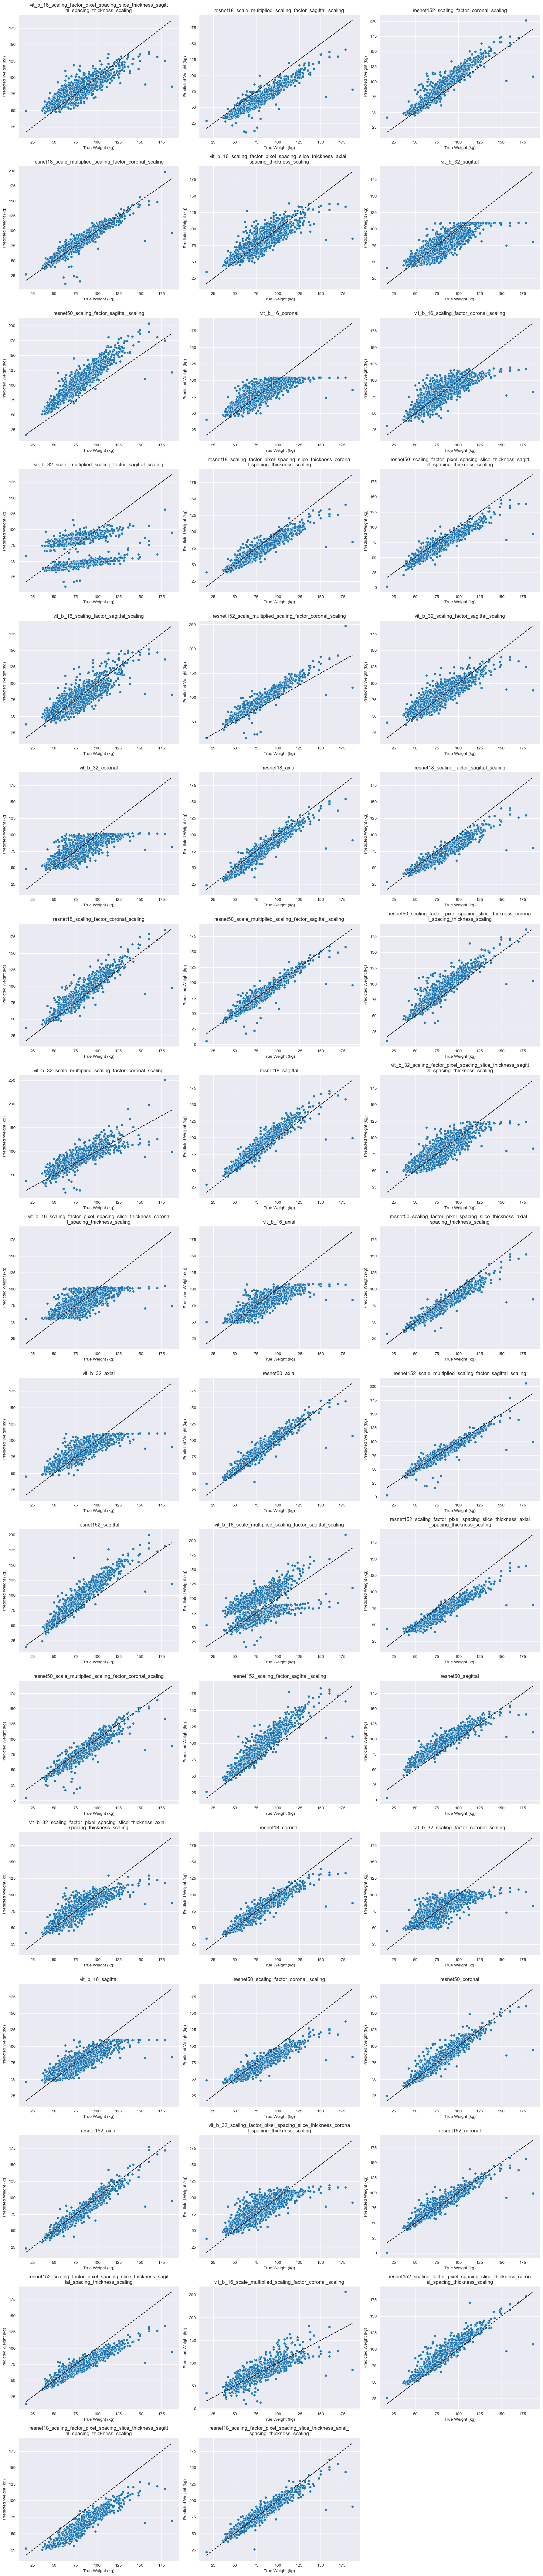

In [67]:
# Get unique model names
models = df['model_name'].unique()


# Adjust the number of rows based on the number of models
n_rows = (len(models) + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot True Weight vs Predicted Weight for each model
for i, model in enumerate(models):
    ax = axes[i]
    model_data = df[df['model_name'] == model]
    
    sns.scatterplot(
        x='true_weight', 
        y='predicted_weight', 
        data=model_data, 
        ax=ax
    )
    ax.plot(
        [model_data['true_weight'].min(), model_data['true_weight'].max()], 
        [model_data['true_weight'].min(), model_data['true_weight'].max()], 
        'k--'
    )
    
    #Wrapping long titles
    wrapped_title = "\n".join(textwrap.wrap(model, width=60))  # Adjust width as needed
    
    ax.set_title(wrapped_title)
    ax.set_xlabel("True Weight (kg)")
    ax.set_ylabel("Predicted Weight (kg)")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

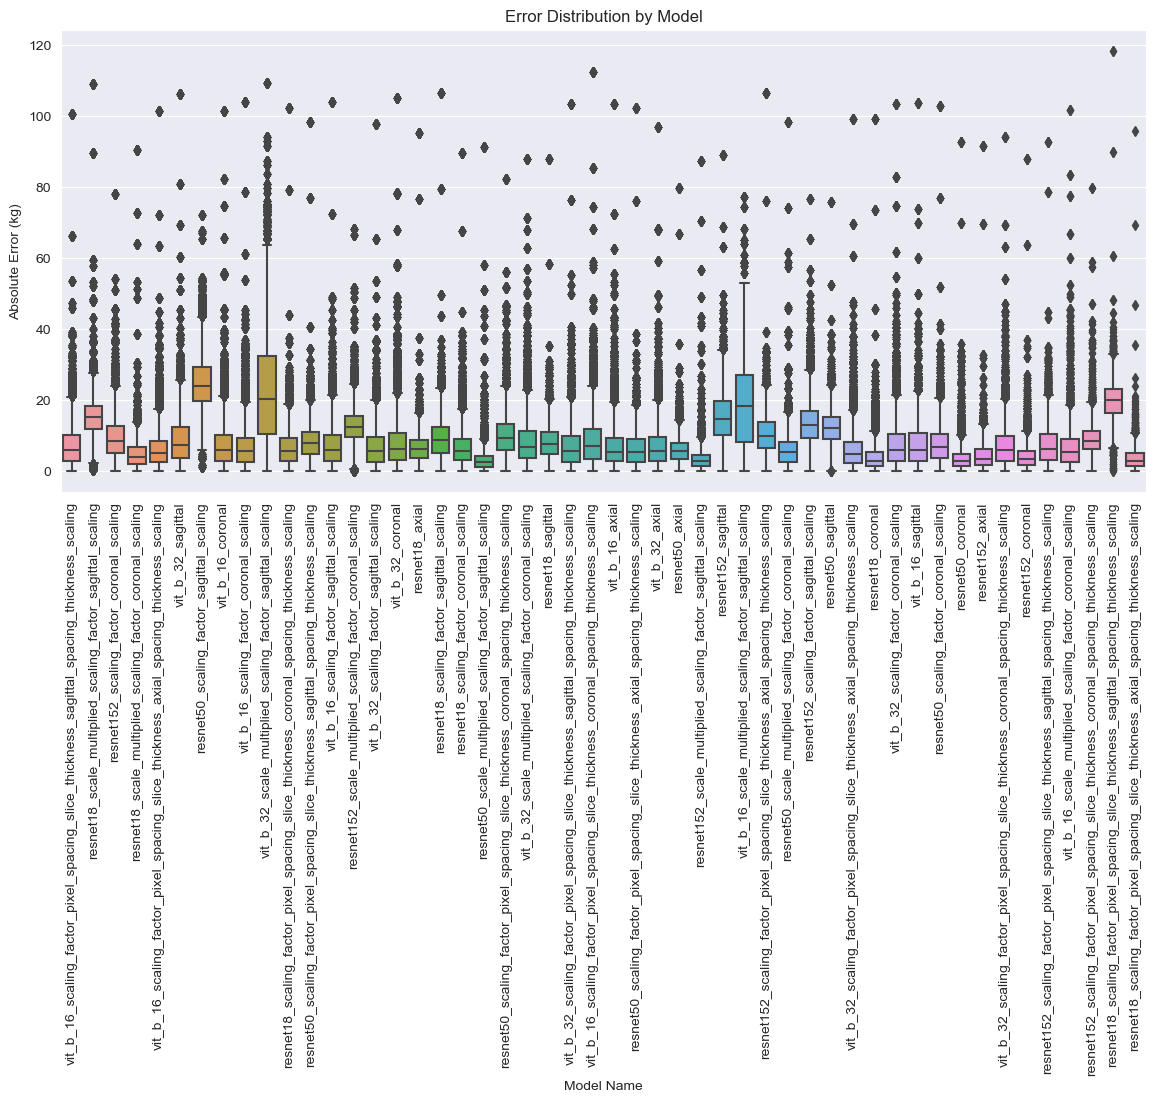

In [68]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='model_name', y='absolute_error', data=df)
plt.xticks(rotation=90)
plt.title("Error Distribution by Model")
plt.ylabel("Absolute Error (kg)")
plt.xlabel("Model Name")
plt.show()

In [69]:
# Sort by model_name and absolute_error to find best/worst predictions
best_performance = df.loc[df.groupby('model_name')['absolute_error'].idxmin()]
worst_performance = df.loc[df.groupby('model_name')['absolute_error'].idxmax()]

display(best_performance[['model_name', 'patient_id', 'pixel_array_file', 'true_weight', 'predicted_weight', 'absolute_error']])
display(worst_performance[['model_name', 'patient_id', 'pixel_array_file', 'true_weight', 'predicted_weight', 'absolute_error']])

model_name         patient_id  \
2770855                                    resnet152_axial  ANONYM-6LL37I_457   
3032727                                  resnet152_coronal  ANONYM-SMUXNZ_186   
1453769                                 resnet152_sagittal   ANONYM-F0BEK6_19   
306603   resnet152_scale_multiplied_scaling_factor_coro...  ANONYM-W6HAEI_112   
1361807  resnet152_scale_multiplied_scaling_factor_sagi...   ANONYM-OCOPMB_38   
17228             resnet152_scaling_factor_coronal_scaling  ANONYM-SMUXNZ_398   
1644269  resnet152_scaling_factor_pixel_spacing_slice_t...   ANONYM-XT8UJZ_12   
3445615  resnet152_scaling_factor_pixel_spacing_slice_t...  ANONYM-SMUXNZ_237   
3166517  resnet152_scaling_factor_pixel_spacing_slice_t...   ANONYM-GS4VD_339   
1845690          resnet152_scaling_factor_sagittal_scaling   ANONYM-F0BEK6_41   
446848                                      resnet18_axial  ANONYM-F0BEK6_133   
2169713                                   resnet18_coronal  ANONYM-5ZVPRM_169   
806193                                   resnet18_sagittal  ANONYM-6LL37I_266   
27651    resnet18_scale_multiplied_scaling_factor_coron...   ANONYM-5ZVPRM_61   
6548     resnet18_scale_multiplied_scaling_factor_sagit...   ANONYM-3X1ZSG_20   
555493             resnet18_scaling_factor_coronal_scaling   ANONYM-SMUXNZ_99   
3735042  resnet18_scaling_factor_pixel_spacing_slice_th...  ANONYM-5ZVPRM_248   
193422   resnet18_scaling_factor_pixel_spacing_slice_th...  ANONYM-SMUXNZ_190   
3587782  resnet18_scaling_factor_pixel_spacing_slice_th...  ANONYM-5ZVPRM_267   
499439            resnet18_scaling_factor_sagittal_scaling  ANONYM-E1BFTJ_300   
1274393                                     resnet50_axial  ANONYM-LWQW5V_163   
2646670                                   resnet50_coronal   ANONYM-LWQW5V_82   
1949927                                  resnet50_sagittal   ANONYM-OCOPMB_39   
1741026  resnet50_scale_multiplied_scaling_factor_coron...  ANONYM-XT8UJZ_210   
614344   resnet50_scale_multiplied_scaling_factor_sagit...  ANONYM-CKABW1_215   
2521829            resnet50_scaling_factor_coronal_scaling  ANONYM-E1BFTJ_300   
1107079  resnet50_scaling_factor_pixel_spacing_slice_th...    ANONYM-SMUXNZ_6   
676621   resnet50_scaling_factor_pixel_spacing_slice_th...  ANONYM-F0BEK6_154   
227572   resnet50_scaling_factor_pixel_spacing_slice_th...  ANONYM-E1BFTJ_352   
81725             resnet50_scaling_factor_sagittal_scaling  ANONYM-6LL37I_484   
1027232                                     vit_b_16_axial   ANONYM-GS4VD_303   
105388                                    vit_b_16_coronal  ANONYM-W6HAEI_133   
2402566                                  vit_b_16_sagittal  ANONYM-BI33HV_254   
3305478  vit_b_16_scale_multiplied_scaling_factor_coron...   ANONYM-LWQW5V_57   
1546385  vit_b_16_scale_multiplied_scaling_factor_sagit...  ANONYM-6LL37I_520   
130617             vit_b_16_scaling_factor_coronal_scaling   ANONYM-GS4VD_450   
41933    vit_b_16_scaling_factor_pixel_spacing_slice_th...  ANONYM-SMUXNZ_271   
949683   vit_b_16_scaling_factor_pixel_spacing_slice_th...   ANONYM-E1BFTJ_67   
1583     vit_b_16_scaling_factor_pixel_spacing_slice_th...  ANONYM-6LL37I_277   
264767            vit_b_16_scaling_factor_sagittal_scaling  ANONYM-OCOPMB_160   
1187504                                     vit_b_32_axial  ANONYM-SMUXNZ_165   
396873                                    vit_b_32_coronal   ANONYM-LWQW5V_33   
60395                                    vit_b_32_sagittal  ANONYM-E1BFTJ_138   
740471   vit_b_32_scale_multiplied_scaling_factor_coron...    ANONYM-GS4VD_11   
160956   vit_b_32_scale_multiplied_scaling_factor_sagit...  ANONYM-B4PMUQ_245   
2285226            vit_b_32_scaling_factor_coronal_scaling   ANONYM-XT8UJZ_55   
2058394  vit_b_32_scaling_factor_pixel_spacing_slice_th...  ANONYM-6LL37I_403   
2899509  vit_b_32_scaling_factor_pixel_spacing_slice_th...  ANONYM-CKABW1_407   
877410   vit_b_32_scaling_factor_pixel_spacing_slice_th...   ANONYM-W6HAEI_10  

model_name         patient_id  \
2771089                                    resnet152_axial  ANONYM-3X1ZSG_189   
3031948                                  resnet152_coronal  ANONYM-3X1ZSG_189   
1453421                                 resnet152_sagittal   ANONYM-3X1ZSG_52   
306188   resnet152_scale_multiplied_scaling_factor_coro...   ANONYM-CKABW1_13   
1361278  resnet152_scale_multiplied_scaling_factor_sagi...  ANONYM-3X1ZSG_189   
15949             resnet152_scaling_factor_coronal_scaling  ANONYM-3X1ZSG_189   
1642654  resnet152_scaling_factor_pixel_spacing_slice_t...  ANONYM-3X1ZSG_189   
3445219  resnet152_scaling_factor_pixel_spacing_slice_t...  ANONYM-3X1ZSG_189   
3166774  resnet152_scaling_factor_pixel_spacing_slice_t...  ANONYM-3X1ZSG_189   
1844893          resnet152_scaling_factor_sagittal_scaling  ANONYM-3X1ZSG_189   
446806                                      resnet18_axial  ANONYM-3X1ZSG_189   
2170234                                   resnet18_coronal  ANONYM-3X1ZSG_189   
807319                                   resnet18_sagittal  ANONYM-3X1ZSG_189   
27673    resnet18_scale_multiplied_scaling_factor_coron...  ANONYM-3X1ZSG_189   
7156     resnet18_scale_multiplied_scaling_factor_sagit...  ANONYM-3X1ZSG_189   
555253             resnet18_scaling_factor_coronal_scaling  ANONYM-3X1ZSG_189   
3735388  resnet18_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
191809   resnet18_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
3588838  resnet18_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
499564            resnet18_scaling_factor_sagittal_scaling  ANONYM-3X1ZSG_189   
1273348                                     resnet50_axial  ANONYM-3X1ZSG_189   
2645056                                   resnet50_coronal  ANONYM-3X1ZSG_189   
1950409                                  resnet50_sagittal  ANONYM-3X1ZSG_189   
1742308  resnet50_scale_multiplied_scaling_factor_coron...  ANONYM-3X1ZSG_189   
613873   resnet50_scale_multiplied_scaling_factor_sagit...  ANONYM-3X1ZSG_189   
2521954            resnet50_scaling_factor_coronal_scaling  ANONYM-3X1ZSG_189   
1106281  resnet50_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
675424   resnet50_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
226981   resnet50_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
81713             resnet50_scaling_factor_sagittal_scaling   ANONYM-3X1ZSG_52   
1027144                                     vit_b_16_axial  ANONYM-3X1ZSG_189   
103879                                    vit_b_16_coronal  ANONYM-3X1ZSG_189   
2401783                                  vit_b_16_sagittal  ANONYM-3X1ZSG_189   
3304531  vit_b_16_scale_multiplied_scaling_factor_coron...  ANONYM-3X1ZSG_189   
1544925  vit_b_16_scale_multiplied_scaling_factor_sagit...  ANONYM-SMUXNZ_308   
130258             vit_b_16_scaling_factor_coronal_scaling  ANONYM-3X1ZSG_189   
42328    vit_b_16_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
950938   vit_b_16_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
1294     vit_b_16_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
265084            vit_b_16_scaling_factor_sagittal_scaling  ANONYM-3X1ZSG_189   
1188349                                     vit_b_32_axial  ANONYM-3X1ZSG_189   
396979                                    vit_b_32_coronal  ANONYM-3X1ZSG_189   
59914                                    vit_b_32_sagittal  ANONYM-3X1ZSG_189   
739906   vit_b_32_scale_multiplied_scaling_factor_coron...  ANONYM-3X1ZSG_189   
158562   vit_b_32_scale_multiplied_scaling_factor_sagit...  ANONYM-SMUXNZ_308   
2284543            vit_b_32_scaling_factor_coronal_scaling  ANONYM-3X1ZSG_189   
2058856  vit_b_32_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
2900053  vit_b_32_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189   
877663   vit_b_32_scaling_factor_pixel_spacing_slice_th...  ANONYM-3X1ZSG_189  

In [70]:
# plot scan 193
scan_193 = df[df['pixel_array_file'] == 'Scan_193.npy']
scan_193 = np.load(f"../../Data/PixelArray/{scan_193['pixel_array_file'].iloc[0]}")

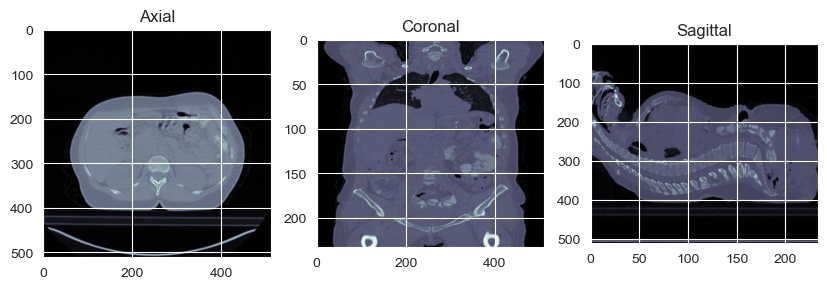

In [71]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(scan_193[scan_193.shape[0] // 2, :, :], cmap='bone', aspect=1)
ax[0].set_title("Axial")
ax[1].imshow(scan_193[:, scan_193.shape[1] // 2, :], cmap='bone', aspect=2)
ax[1].set_title("Coronal")
ax[2].imshow(scan_193[:, :, scan_193.shape[2] // 2].T, cmap='bone', aspect=0.4)
ax[2].set_title("Sagittal")
plt.show()

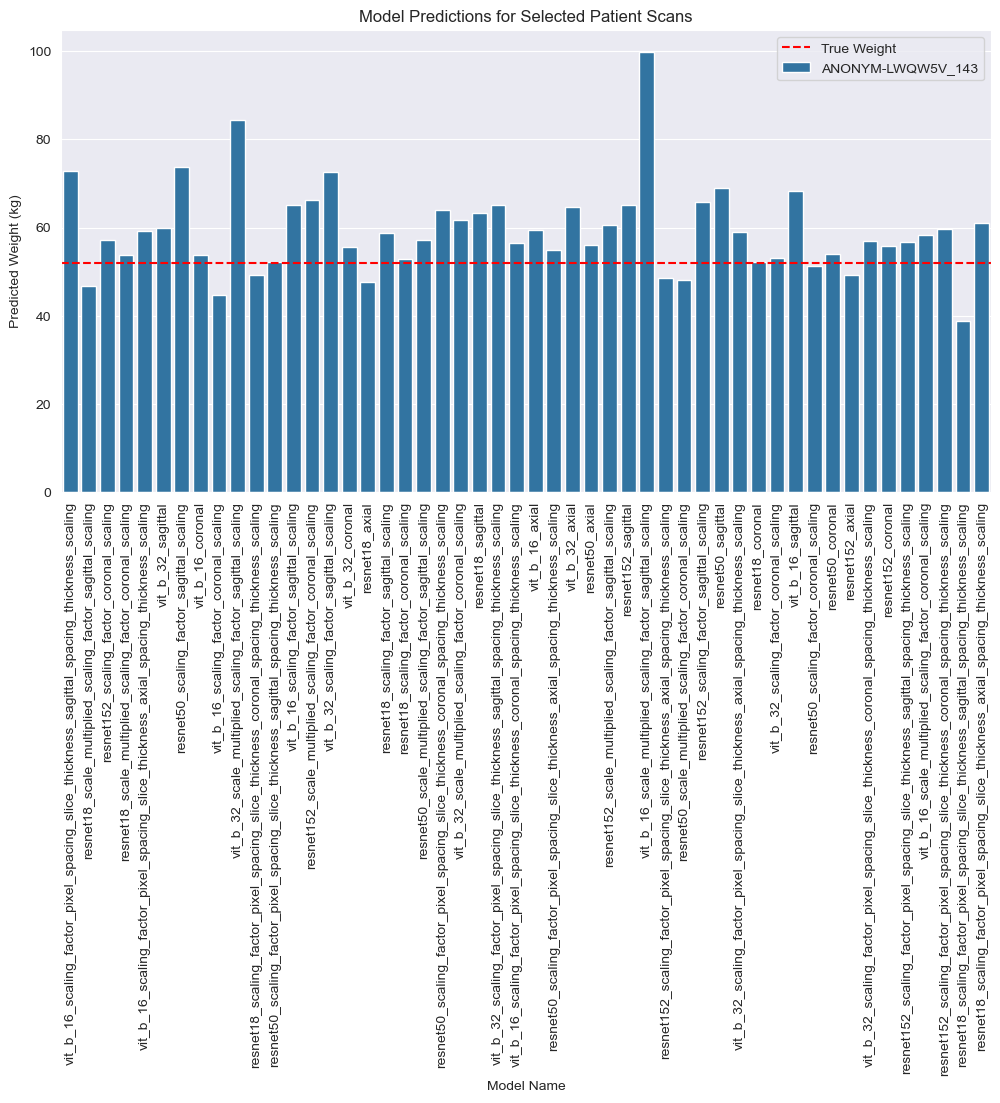

In [72]:
# Select specific scans
sample_scans = df[df['patient_id'].isin(['ANONYM-LWQW5V_143'])]

# Plot predictions for each model on selected scans
plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='predicted_weight', hue='patient_id', data=sample_scans)
plt.axhline(y=sample_scans['true_weight'].iloc[0], color='red', linestyle='--', label='True Weight')
plt.legend()
plt.title("Model Predictions for Selected Patient Scans")
plt.ylabel("Predicted Weight (kg)")
plt.xlabel("Model Name")
plt.xticks(rotation=90)
plt.show()

## Model Statistics

In [73]:
statistics = pd.read_csv('model_statistics.csv')
statistics

model_name                        dataset_name                query  \
0    resnet18                               axial  BodyPart == "Stamm"   
1    resnet50                               axial  BodyPart == "Stamm"   
2    vit_b_16                               axial  BodyPart == "Stamm"   
3    vit_b_32                               axial  BodyPart == "Stamm"   
4    resnet18                             coronal  BodyPart == "Stamm"   
5    resnet50                             coronal  BodyPart == "Stamm"   
6    vit_b_16                             coronal  BodyPart == "Stamm"   
7    vit_b_32                             coronal  BodyPart == "Stamm"   
8    resnet18                            sagittal  BodyPart == "Stamm"   
9    resnet50                            sagittal  BodyPart == "Stamm"   
10   vit_b_16                            sagittal  BodyPart == "Stamm"   
11   vit_b_32                            sagittal  BodyPart == "Stamm"   
12   resnet18                     coronal_scaling  BodyPart == "Stamm"   
13   resnet50                     coronal_scaling  BodyPart == "Stamm"   
14   vit_b_16                     coronal_scaling  BodyPart == "Stamm"   
15   vit_b_32                     coronal_scaling  BodyPart == "Stamm"   
16  resnet152                               axial  BodyPart == "Stamm"   
17  resnet152                             coronal  BodyPart == "Stamm"   
18  resnet152                            sagittal  BodyPart == "Stamm"   
19  resnet152                     coronal_scaling  BodyPart == "Stamm"   
20   resnet18                    sagittal_scaling  BodyPart == "Stamm"   
21   resnet50                    sagittal_scaling  BodyPart == "Stamm"   
22  resnet152                    sagittal_scaling  BodyPart == "Stamm"   
23   vit_b_16                    sagittal_scaling  BodyPart == "Stamm"   
24   vit_b_32                    sagittal_scaling  BodyPart == "Stamm"   
25   resnet18                     coronal_scaling  BodyPart == "Stamm"   
26   resnet50                     coronal_scaling  BodyPart == "Stamm"   
27  resnet152                     coronal_scaling  BodyPart == "Stamm"   
28   vit_b_16                     coronal_scaling  BodyPart == "Stamm"   
29   vit_b_32                     coronal_scaling  BodyPart == "Stamm"   
30   resnet18                    sagittal_scaling  BodyPart == "Stamm"   
31   resnet50                    sagittal_scaling  BodyPart == "Stamm"   
32  resnet152                    sagittal_scaling  BodyPart == "Stamm"   
33   vit_b_16                    sagittal_scaling  BodyPart == "Stamm"   
34   vit_b_32                    sagittal_scaling  BodyPart == "Stamm"   
35   resnet18     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
36   resnet50     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
37  resnet152     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
38   vit_b_16     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
39   vit_b_32     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
40   resnet18   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
41   resnet50   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
42  resnet152   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
43   vit_b_16   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
44   vit_b_32   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
45   resnet18  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   
46   resnet50  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   
47  resnet152  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   
48   vit_b_16  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   
49   vit_b_32  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   

    with_scaling_factor  multiplied_scaling_factor  \
0                 False                      False   
1                 False                      False   
2                 False                      False   
3           

In [74]:
# Compare multiplied scaling factor to additively scaled models
scaling_models = statistics[statistics['with_scaling_factor'] == True]
scaling_models

model_name                        dataset_name                query  \
12   resnet18                     coronal_scaling  BodyPart == "Stamm"   
13   resnet50                     coronal_scaling  BodyPart == "Stamm"   
14   vit_b_16                     coronal_scaling  BodyPart == "Stamm"   
15   vit_b_32                     coronal_scaling  BodyPart == "Stamm"   
19  resnet152                     coronal_scaling  BodyPart == "Stamm"   
20   resnet18                    sagittal_scaling  BodyPart == "Stamm"   
21   resnet50                    sagittal_scaling  BodyPart == "Stamm"   
22  resnet152                    sagittal_scaling  BodyPart == "Stamm"   
23   vit_b_16                    sagittal_scaling  BodyPart == "Stamm"   
24   vit_b_32                    sagittal_scaling  BodyPart == "Stamm"   
25   resnet18                     coronal_scaling  BodyPart == "Stamm"   
26   resnet50                     coronal_scaling  BodyPart == "Stamm"   
27  resnet152                     coronal_scaling  BodyPart == "Stamm"   
28   vit_b_16                     coronal_scaling  BodyPart == "Stamm"   
29   vit_b_32                     coronal_scaling  BodyPart == "Stamm"   
30   resnet18                    sagittal_scaling  BodyPart == "Stamm"   
31   resnet50                    sagittal_scaling  BodyPart == "Stamm"   
32  resnet152                    sagittal_scaling  BodyPart == "Stamm"   
33   vit_b_16                    sagittal_scaling  BodyPart == "Stamm"   
34   vit_b_32                    sagittal_scaling  BodyPart == "Stamm"   
35   resnet18     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
36   resnet50     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
37  resnet152     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
38   vit_b_16     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
39   vit_b_32     axial_spacing_thickness_scaling  BodyPart == "Stamm"   
40   resnet18   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
41   resnet50   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
42  resnet152   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
43   vit_b_16   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
44   vit_b_32   coronal_spacing_thickness_scaling  BodyPart == "Stamm"   
45   resnet18  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   
46   resnet50  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   
47  resnet152  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   
48   vit_b_16  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   
49   vit_b_32  sagittal_spacing_thickness_scaling  BodyPart == "Stamm"   

    with_scaling_factor  multiplied_scaling_factor  \
12                 True                      False   
13                 True                      False   
14                 True                      False   
15                 True                      False   
19                 True                      False   
20                 True                      False   
21                 True                      False   
22                 True                      False   
23                 True                      False   
24                 True                      False   
25                 True                       True   
26                 True                       True   
27                 True                       True   
28                 True                       True   
29                 True                       True   
30                 True                       True   
31                 True                       True   
32                 True                       True   
33                 True                       True   
34                 True                       True   
35                 True                      False   
36                 True                      False   
37                 True                      False   
38                 True                   

In [75]:
# mean absolute error comparison between multiplied and additively scaled models
mean_abs_err_non_multiplied = statistics[statistics['multiplied_scaling_factor'] == False]['val_loss mean_absolute_error'].mean()
mean_abs_err_multiplied = statistics[statistics['multiplied_scaling_factor'] == True]['val_loss mean_absolute_error'].mean()

print(f"Mean Absolute Error for Non-Multiplied Scaling Factor: {mean_abs_err_non_multiplied:.2f} kg")
print(f"Mean Absolute Error for Multiplied Scaling Factor: {mean_abs_err_multiplied:.2f} kg")

Mean Absolute Error for Non-Multiplied Scaling Factor: 8.48 kg
Mean Absolute Error for Multiplied Scaling Factor: 10.31 kg


In [76]:
# best mean absolute error by dataset
best_mean_abs_err = statistics.groupby('dataset_name')['val_loss mean_absolute_error'].min()
best_mean_abs_err

dataset_name
axial                                 4.677278
axial_spacing_thickness_scaling       4.078753
coronal                               4.556400
coronal_scaling                       4.942016
coronal_spacing_thickness_scaling     6.997183
sagittal                              7.526400
sagittal_scaling                      3.677151
sagittal_spacing_thickness_scaling    7.207489
Name: val_loss mean_absolute_error, dtype: float64

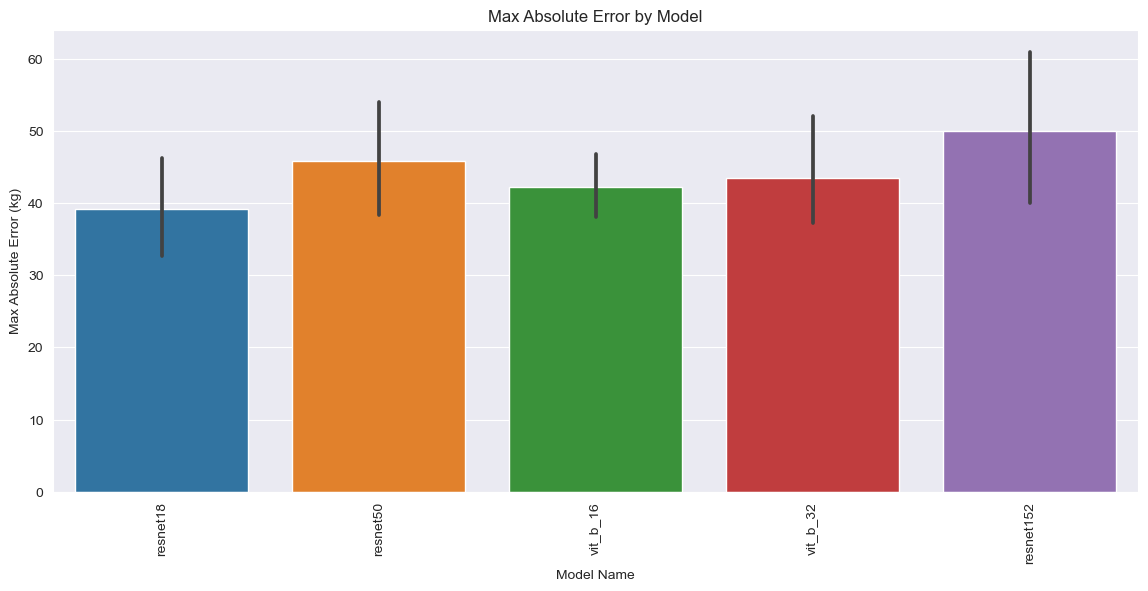

In [78]:
# plot max abs error by model_name
plt.figure(figsize=(14, 6))
sns.barplot(x='model_name', y='max_absolute_error', data=statistics)
plt.xticks(rotation=90)
plt.title("Max Absolute Error by Model")
plt.ylabel("Max Absolute Error (kg)")
plt.xlabel("Model Name")
plt.show()